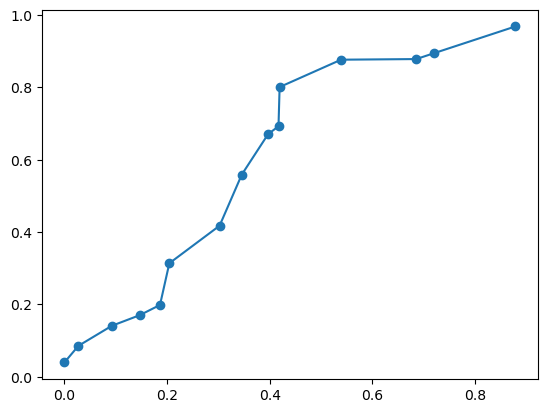

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.sort(np.random.rand(15))
y = np.sort(np.random.rand(15))
names = np.array(list("ABCDEFGHIJKLMNO"))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
line, = plt.plot(x,y, marker="o")

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.dates as mdates

data_path = "/Users/khxsh/Documents/repos/cardillelab/earth-engine-algorithms/tests/kalman/PNW_swir_2022_2023/11-10 16:02/eeek_output.csv"

data = pd.read_csv(data_path)

def plot():
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="ms")

    dates = data["timestamp"]
    intp = data["INTP"]
    cos = data["COS0"]
    sin = data["SIN0"]

    plt.plot(dates, intp, label="intercept", linestyle="-", color="blue")
    plt.plot(dates, cos, label="cos", linestyle="-", color="green")
    plt.plot(dates, sin, label="sin", linestyle="-", color="red")

    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.gca().tick_params(axis="x", labelsize=8)

    plt.show()


interact(plot)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot()>

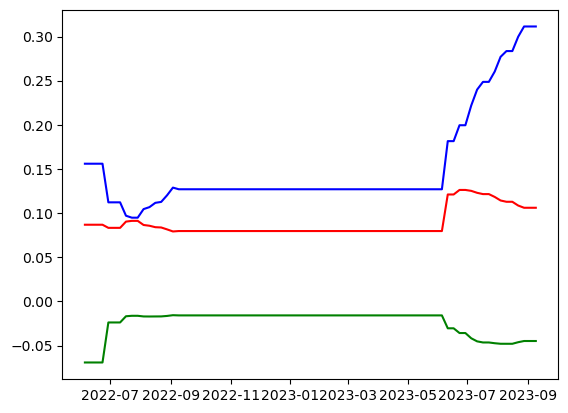

In [3]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

names = np.array(list("ABCDEFGHIJKLMNO"))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()

data["timestamp"] = pd.to_datetime(data["timestamp"], unit="ms")

dates = data["timestamp"]
intp = data["INTP"]
cos = data["COS0"]
sin = data["SIN0"]

intp_line = plt.plot(dates, intp, label="intercept", linestyle="-", color="blue")
cos_line = plt.plot(dates, cos, label="cos", linestyle="-", color="green")
sin_line = plt.plot(dates, sin, label="sin", linestyle="-", color="red")

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = intp_line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()


In [1]:
import json 

with open("kalman/eeek_input.json", "r") as f:
    params = json.load(f)

print(params)

{'Q': [[0.00125, 0.0, 0.0], [0.0, 0.000125, 0.0], [0.0, 0.0, 0.000125]], 'R': [[0.003]], 'P': [[0.00101, 0.0, 0.0], [0.0, 0.00222, 0.0], [0.0, 0.0, 0.00333]], 'initial_state': [0.5, -0.04, -0.04]}
